<a href="https://colab.research.google.com/github/danielahernandz/Series-de-tiempo-avanzado/blob/main/WhiteNoise_RandomWalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Como se genera ruido blanco 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set() 

In [ ]:
#Loading and transforming the Data
data = pd.read_csv("Index2018.csv")
df = data.copy()
df.date = pd.to_datetime(df.date, dayfirst= True) #formato inicio con dia
df.set_index("date", inplace= True) #indice fecha
df = df.asfreq('b') #bussinnes days
df= df.fillna(method='ffill') #periodo posterior

In [ ]:
df['market_value']= df.spx

In [ ]:
del df['spx']
del df['dax']
del df['ftse']
del df['nikkei']

In [ ]:
size= int(len(df)*0.8)
df_, df_test = df.iloc[:size], df.iloc[size:]

White Noise / Ruido Blanco

In [ ]:
#Generando ruido blanco o seq aleatoria con: loc(localización representativa=media), escala=desviacion, size=tamaño
wn = np.random.normal(loc = df_.market_value.mean(), scale = df_.market_value.std(), size= len(df_))

In [ ]:
#Add columna de ruido blanco
df_['wn'] = wn 

<ipython-input-21-0743ecb8d467>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['wn'] = wn


In [ ]:
df_.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1090.917409
std,292.559287,294.442373
min,438.920000,83.413143
25%,914.620000,891.906956
50%,1144.650000,1092.232709
75%,1316.280729,1293.056927
max,1570.252238,2215.905901


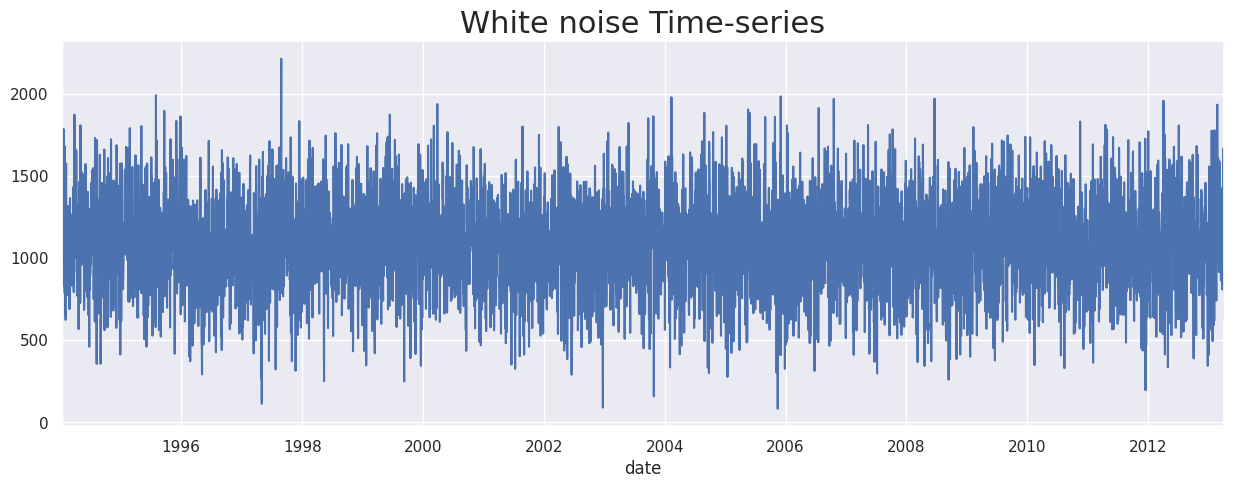

In [ ]:
df_.wn.plot(figsize=(15,5))
plt.title("White noise Time-series", size=22)
plt.show()

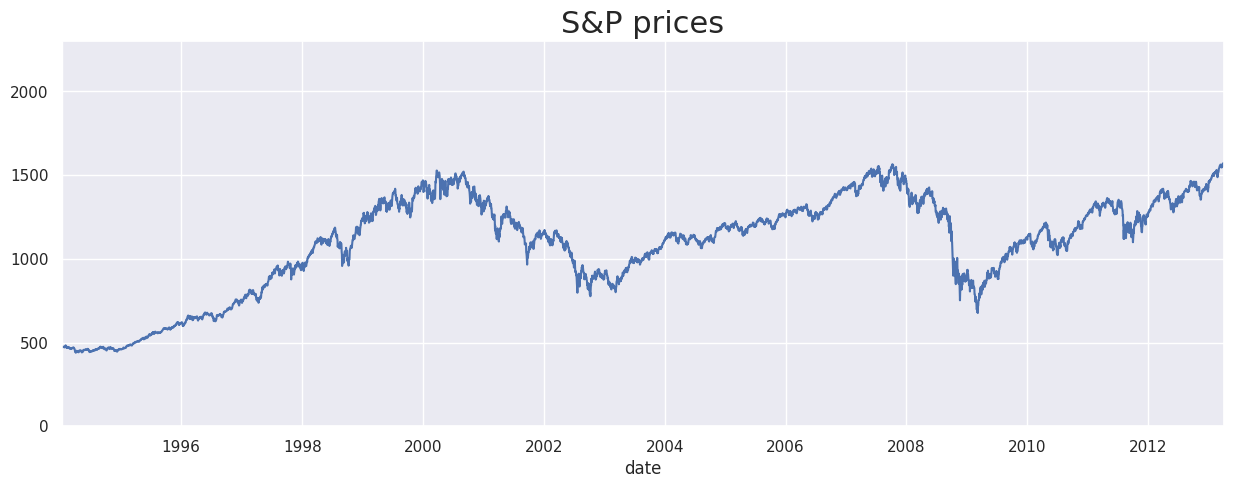

In [ ]:
df_.market_value.plot(figsize=(15,5))
plt.title("S&P prices", size=22)
plt.ylim(0,2300) #Para que puedan ser comparables en escalas antes ($400-1600$ =! 0-2000 wn)
plt.show()

Random Walk / Caminata aleatoria

In [ ]:
rw = pd.read_csv('RandWalk.csv')

In [ ]:
rw.date = pd.to_datetime(rw.date, dayfirst= True)
rw.set_index("date", inplace= True)
rw = rw.asfreq('b')

In [ ]:
df_['rw'] = rw.price

<ipython-input-27-bbdd5e481b34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['rw'] = rw.price


In [ ]:
df_

,market_value,wn,rw
date,,,
1994-01-07,469.900000,1379.446548,1122.139662
1994-01-10,475.270000,1432.389140,1080.347860
1994-01-11,474.130000,1211.327126,1082.095245
1994-01-12,474.170000,995.470443,1083.639265
1994-01-13,472.470000,1070.916965,1067.146255
...,...,...,...
2013-04-01,1562.173837,1667.477119,2263.675474
2013-04-02,1570.252238,1500.759929,2225.000870
2013-04-03,1553.686978,1151.707775,2190.787688


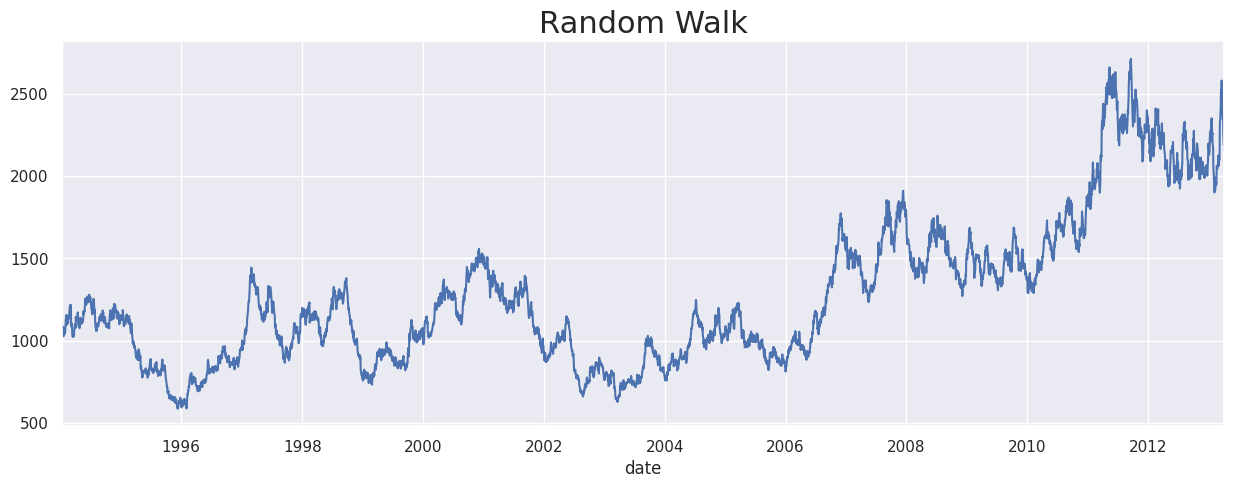

In [ ]:
df_.rw.plot(figsize= (15,5))
plt.title('Random Walk', size=22)
plt.show()

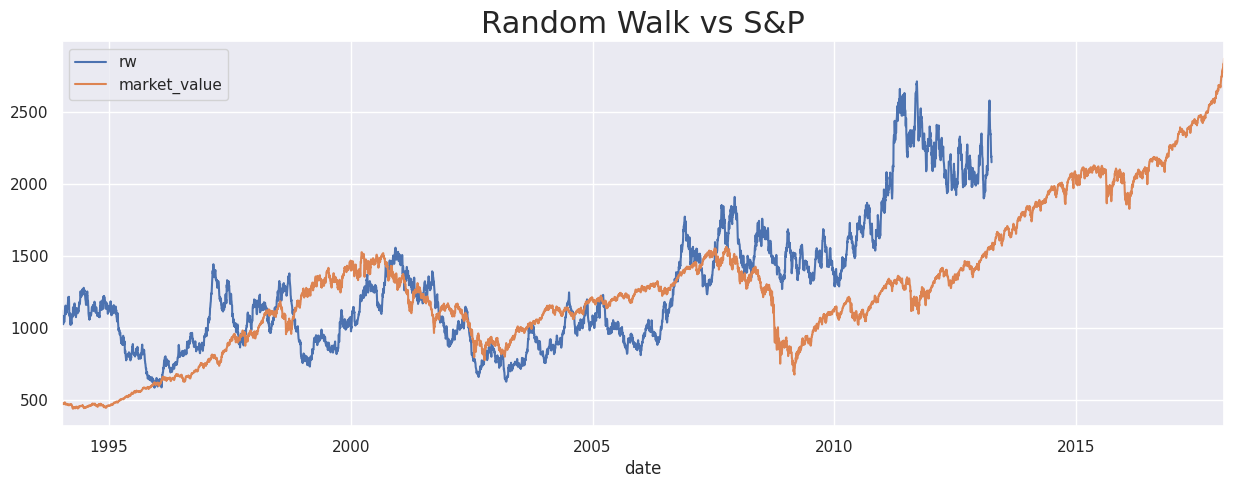

In [ ]:
df_.rw.plot(figsize= (15,5))
df.market_value.plot()
plt.title('Random Walk vs S&P', size=22)
plt.legend()
plt.show()